In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_colwidth', None)
%matplotlib inline
plt.style.use("seaborn")

In [2]:
#import the dataset
df = pd.read_csv('USA_Housing.csv')

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165"
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df['Address'].tail()


4995                           USNS Williams\nFPO AP 30153-7653
4996                      PSC 9258, Box 8489\nAPO AA 42991-3352
4997     4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165
4998                                  USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595
Name: Address, dtype: object

#### Feature Engineeing

In [7]:
def extract_address(x):
    try:
        address = x.split('\n')[1].split(',')[1].split()[0]
    except IndexError:
        address = x.split('\n')[1].split(" ")[1]
    return address

In [8]:
df['Address'] = df['Address'].apply(extract_address)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,AP
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,AA
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,VA
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,AE


In [9]:
df['Address'].nunique()


62

### Univariate Data Analysis

#### Descriptive Statistics

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Check for missing values

<AxesSubplot:>

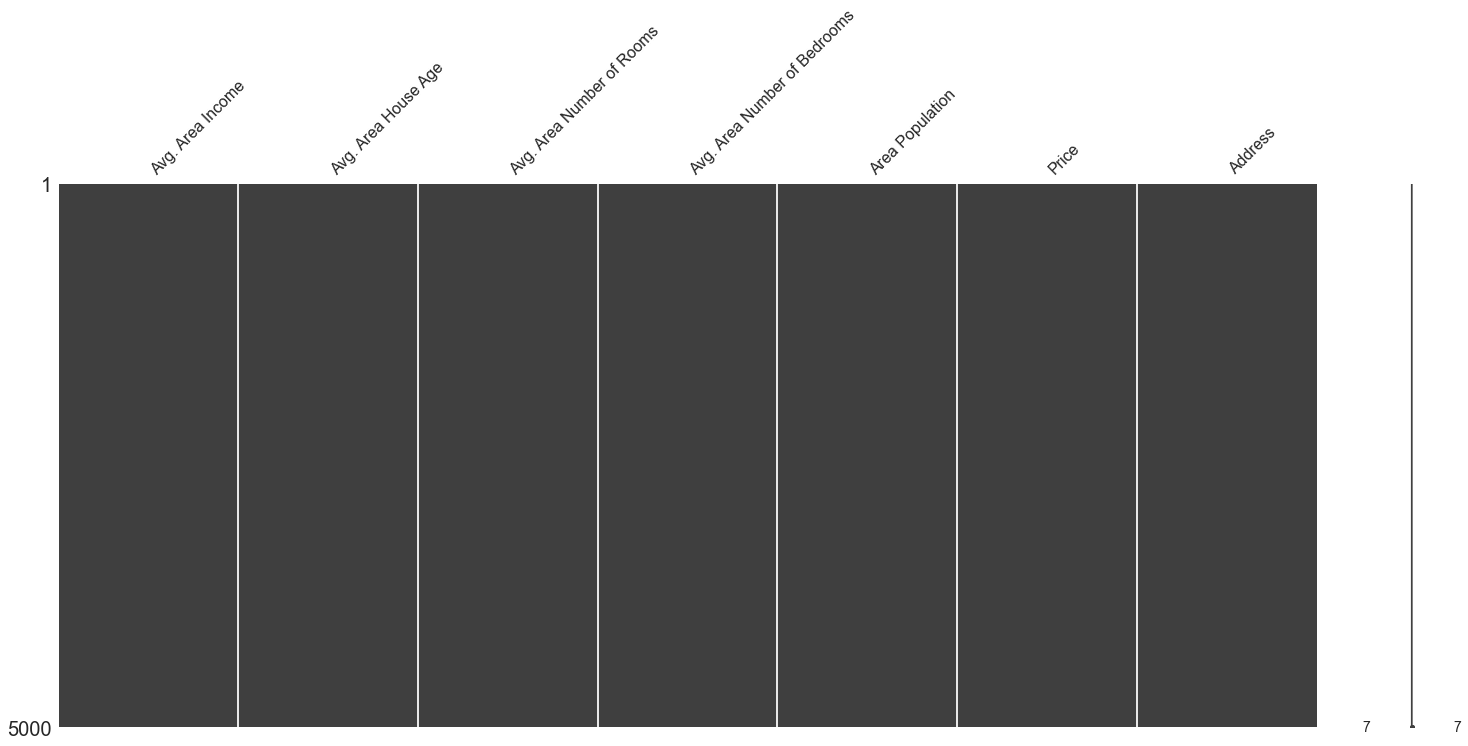

In [9]:
import missingno as msno
msno.matrix(df)

#### Distribution of numerical columns

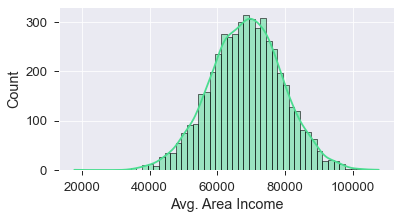

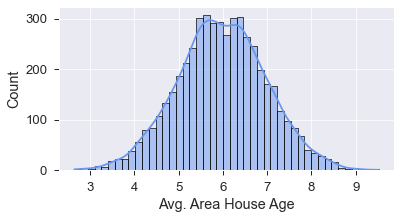

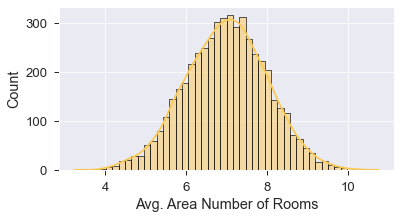

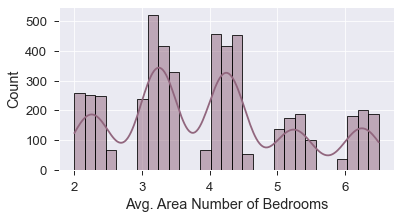

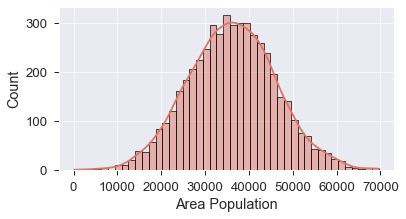

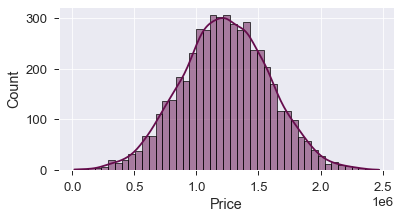

In [10]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.8})
for i in df.columns[:-1]:
    fig,ax = plt.subplots(figsize = (6,3))
    sns.histplot(df[i],kde = True,color = random_color())

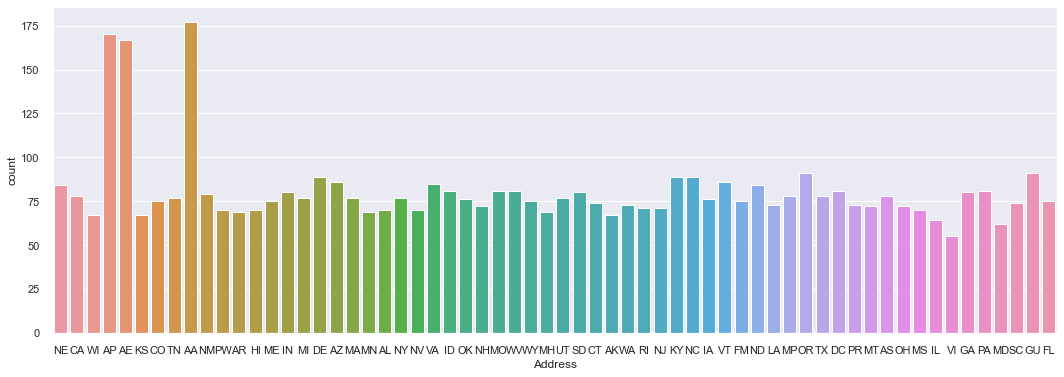

In [31]:
#Address count plot
fig,ax = plt.subplots(figsize = (18,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Address", data=df)

#### Skewness

In [11]:
df.skew()

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

#### Kurtosis

In [12]:
df.kurt()

Avg. Area Income                0.045574
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.074652
Avg. Area Number of Bedrooms   -0.701566
Area Population                -0.006733
Price                          -0.054918
dtype: float64

#### IQR (Inter Quartile Range)

In [13]:
for i in df.columns[:-1]:
    print(i)
    print('IQR: ',df[i].quantile(.75) - df[i].quantile(.25))
    print('-'*3)

Avg. Area Income
IQR:  14302.776277691672
---
Avg. Area House Age
IQR:  1.3285254636139001
---
Avg. Area Number of Rooms
IQR:  1.3666213479867322
---
Avg. Area Number of Bedrooms
IQR:  1.35
---
Area Population
IQR:  13457.362067307087
---
Price
IQR:  473633.0691627944
---


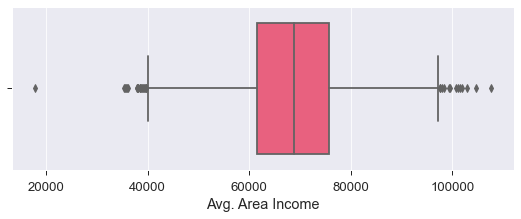

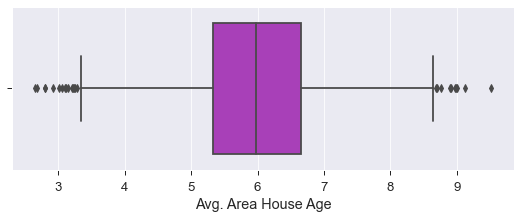

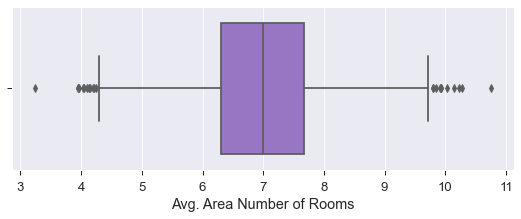

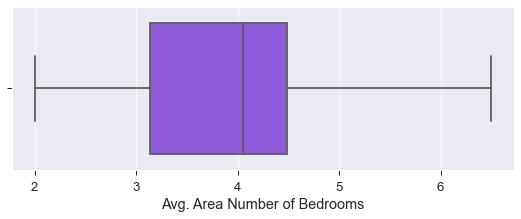

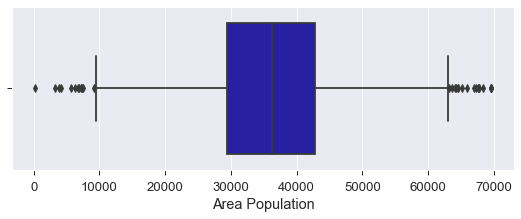

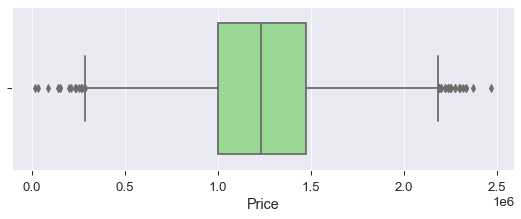

In [15]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.8})
for i in df.columns[:-1]:
    fig,ax = plt.subplots(figsize = (9,3))
    color = np.random.rand(3,)
    ax = sns.boxplot(x=df[i],color = random_color())

### Bivariate Data Analysis

#### Regressionrplot,Bivariate KDE,Hexbin and correlation coefficients

In [13]:
def bivariate_plot(column,color):
    sns.set_context("paper", font_scale=1.8, rc={"lines.linewidth": 1.8})
    sns.set_style('white')
    import scipy.stats
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (21,6))
    sns.regplot(data = df,x=column, y='Price',ax = ax1,color = color,line_kws ={'color' :'red'})
    sns.kdeplot(data=df,x=column,y="Price",ax =ax2,color = color,)
    df.plot.hexbin(x=column, y='Price', gridsize=9,ax = ax3,cmap=plt.cm.Blues)
    fig.suptitle(column, fontsize=18)
    sns.despine()
    plt.show()
    print('Pearson\' correlation coefficient :',df[column].corr(df['Price']))
    print('Spearman\'s correlation coefficient :',df[column].corr(df['Price'],method = 'spearman'))
    print('Kendall\'s correlation coefficient :',df[column].corr(df['Price'],method = 'kendall'))

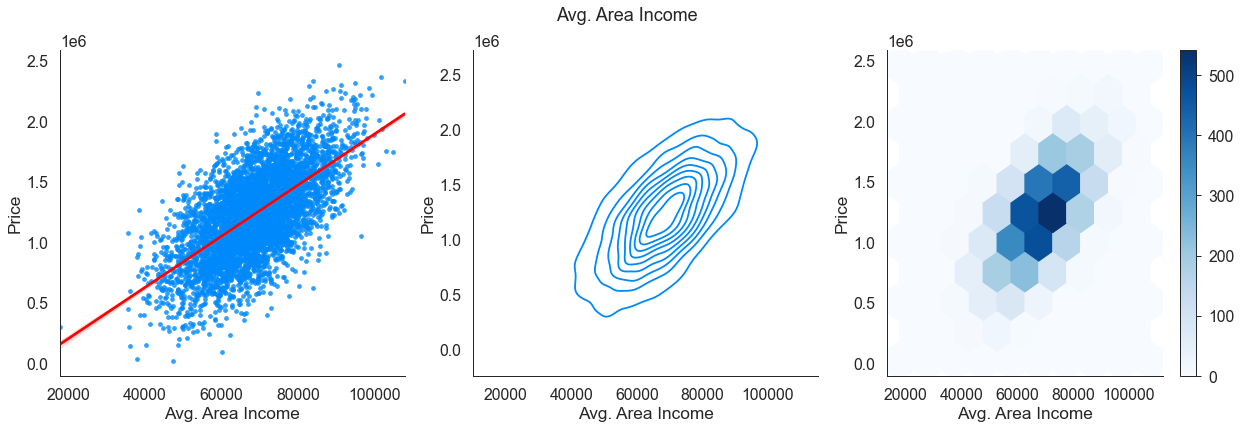

Pearson' correlation coefficient : 0.6397337782498942
Spearman's correlation coefficient : 0.6199618621744744
Kendall's correlation coefficient : 0.4407702340468094


In [14]:
bivariate_plot('Avg. Area Income','#0089fa')

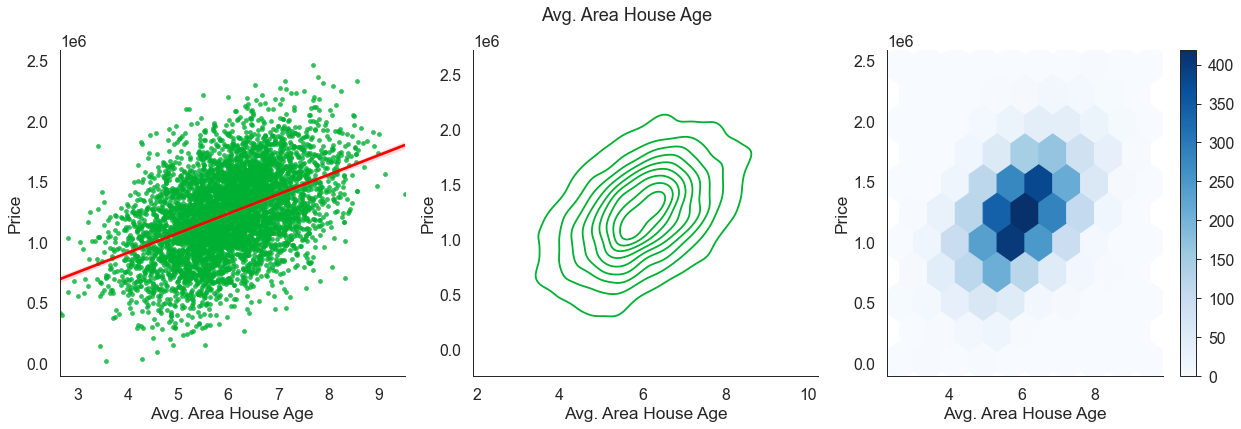

Pearson' correlation coefficient : 0.45254253717875575
Spearman's correlation coefficient : 0.4427245926209837
Kendall's correlation coefficient : 0.30346661332266456


In [15]:
bivariate_plot('Avg. Area House Age','#00b032')

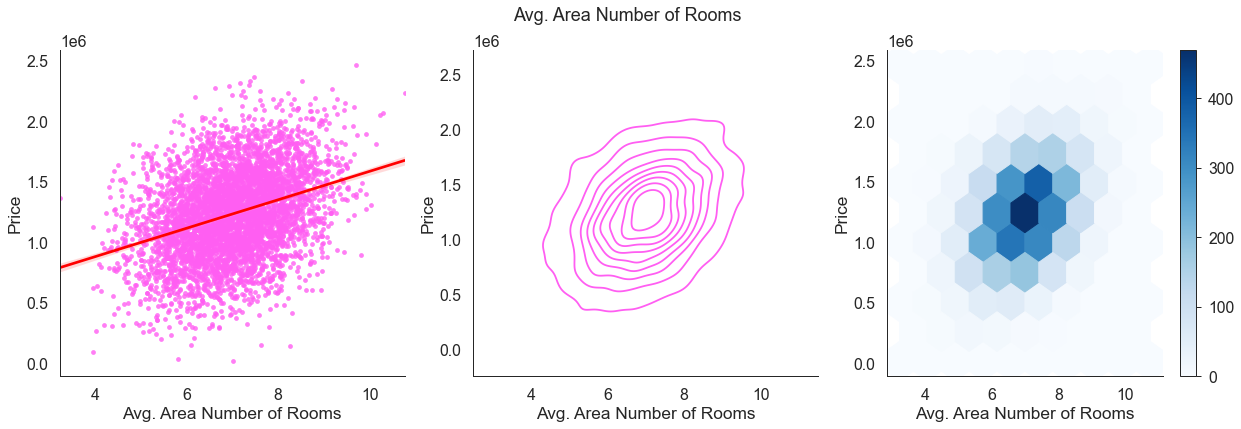

Pearson' correlation coefficient : 0.3356644533667597
Spearman's correlation coefficient : 0.3179236691969467
Kendall's correlation coefficient : 0.21595695139027807


In [16]:
bivariate_plot('Avg. Area Number of Rooms','#ff5ef2')

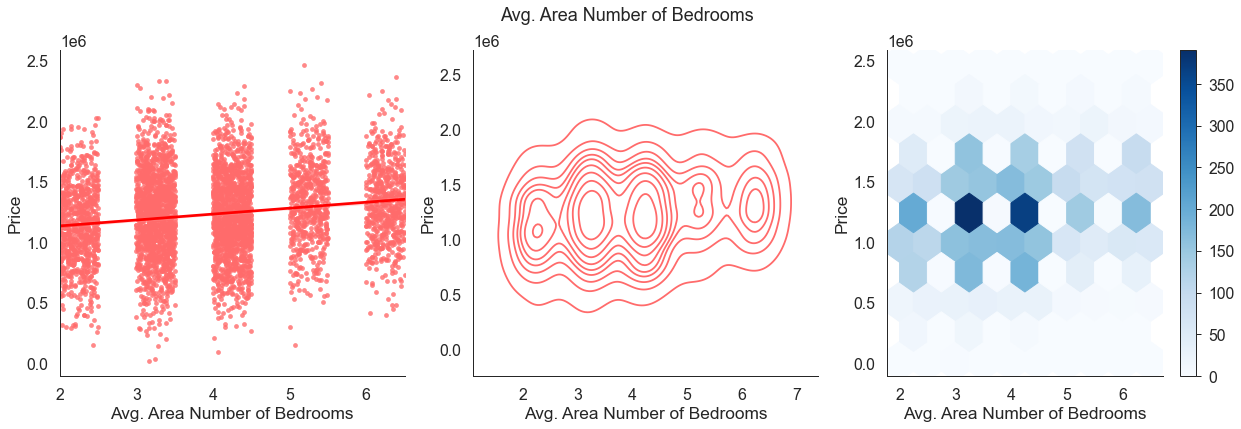

Pearson' correlation coefficient : 0.17107102765855595
Spearman's correlation coefficient : 0.1581727049551064
Kendall's correlation coefficient : 0.10542909856797184


In [18]:
bivariate_plot('Avg. Area Number of Bedrooms','#ff6b6b')

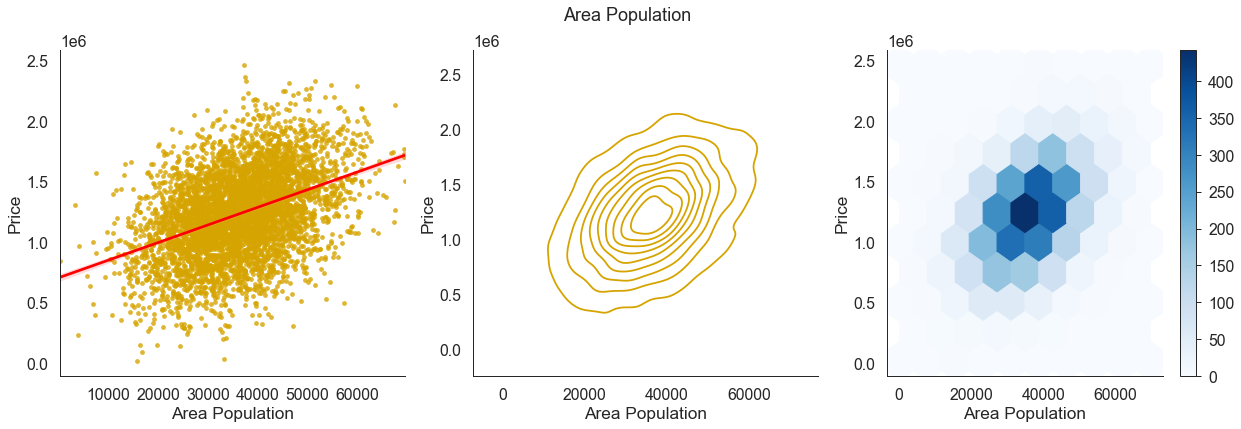

Pearson' correlation coefficient : 0.4085558793165563
Spearman's correlation coefficient : 0.3946491364259654
Kendall's correlation coefficient : 0.2696123224644929


In [19]:
bivariate_plot('Area Population','#d6a400')

### Bivariate and Multivariate  Data Analysis

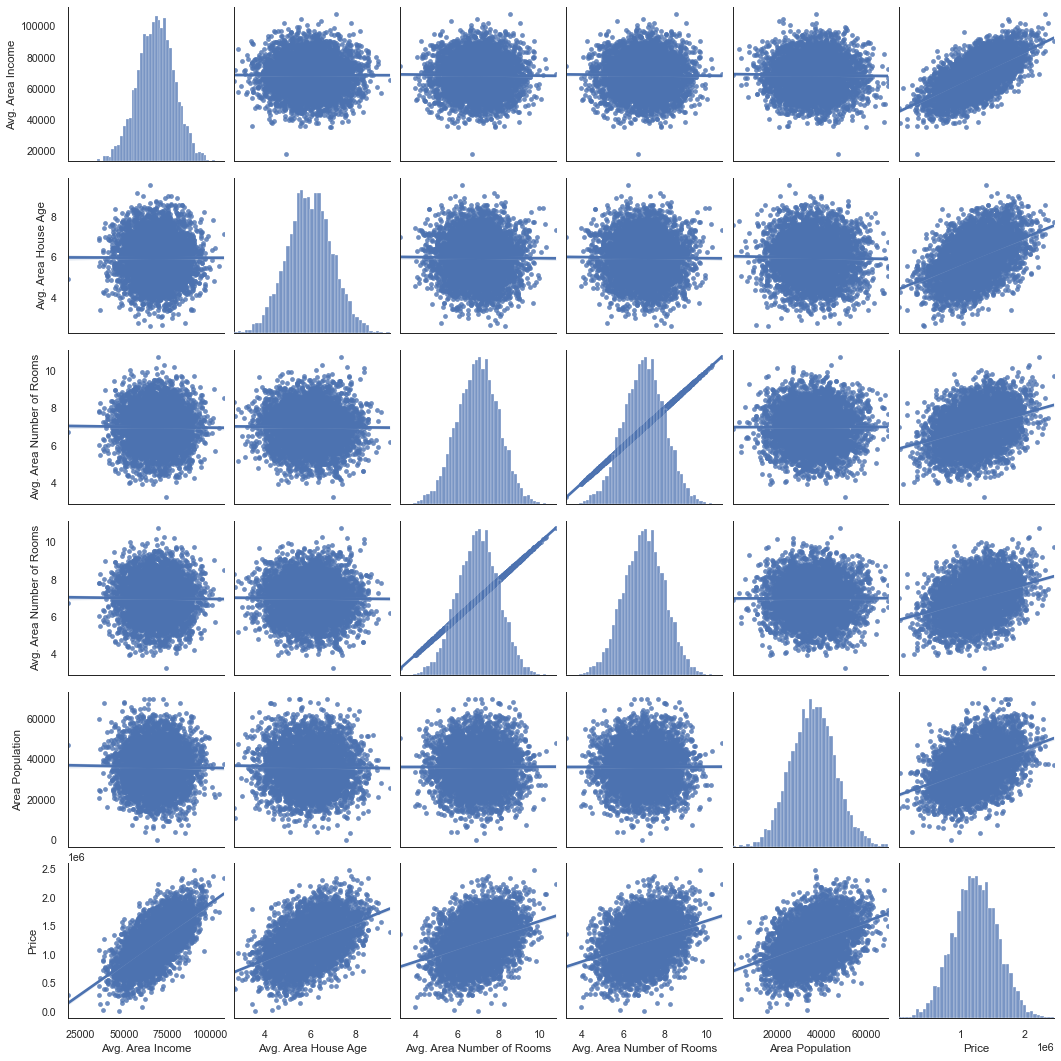

In [21]:
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 1.8})
sns.pairplot(df,vars = ['Avg. Area Income',
                        'Avg. Area House Age','Avg. Area Number of Rooms',
                        'Avg. Area Number of Rooms','Area Population','Price'],kind= 'reg')

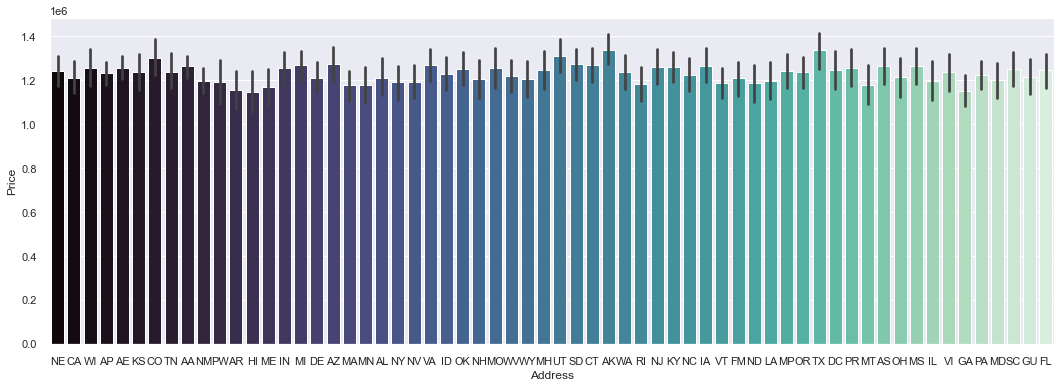

In [44]:
fig,ax = plt.subplots(figsize = (18,6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Address", y="Price", data=df,palette = 'mako')

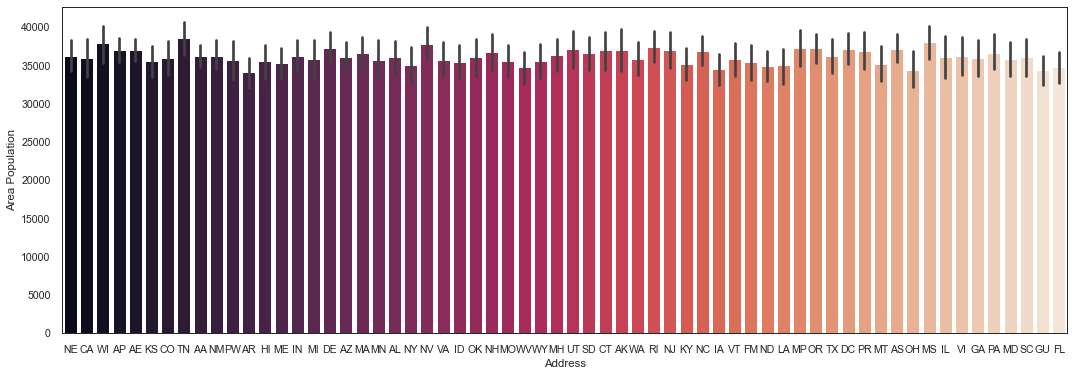

In [22]:
fig,ax = plt.subplots(figsize = (18,6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Address", y="Area Population", data=df,palette = 'rocket')

In [23]:
df.sort_values('Price').Address

3212    OH
1271    MT
1799    AZ
1459    PR
1661    TN
        ..
1248    ND
924     MO
693     CO
2719    IA
465     AE
Name: Address, Length: 5000, dtype: object

In [24]:
#correlation matrix
corr = df.corr(method = 'pearson')
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

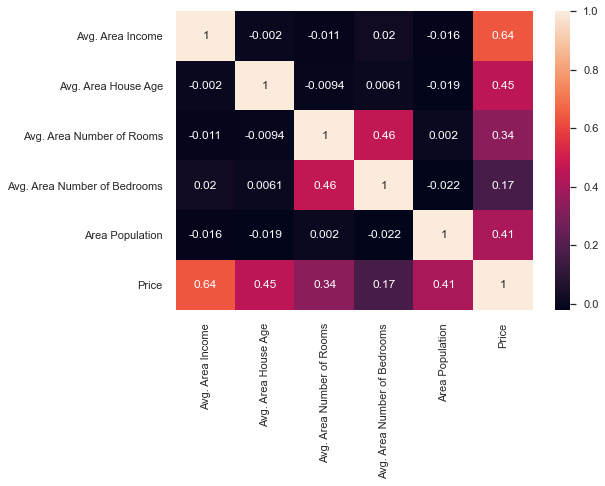

In [25]:
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns,annot=True)

#### Dealing with Outliers

In [26]:
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)        
    return df            
df_outlier = remove_outliers(df)

In [27]:
#DataFrame without outliers
df_outlier

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,AP
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,AA
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,VA
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,AE


### Variable Transforamtion

#### Check the quantiles

In [42]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.suptitle(variable, fontsize=16)
    plt.show()

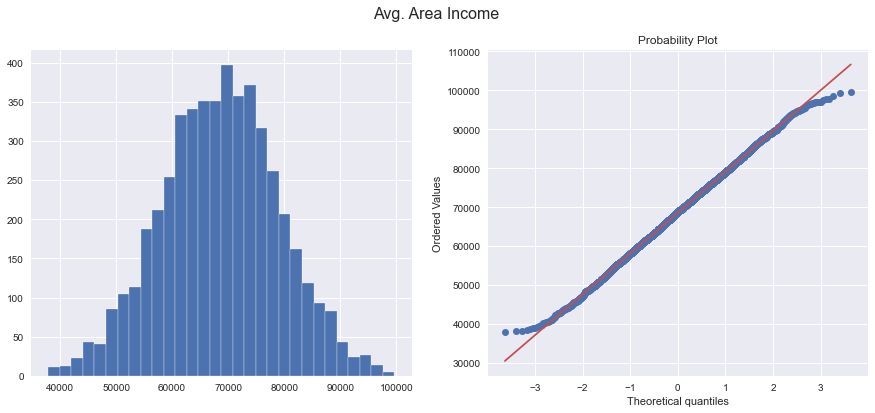

In [43]:
diagnostic_plots(df_outlier, 'Avg. Area Income')

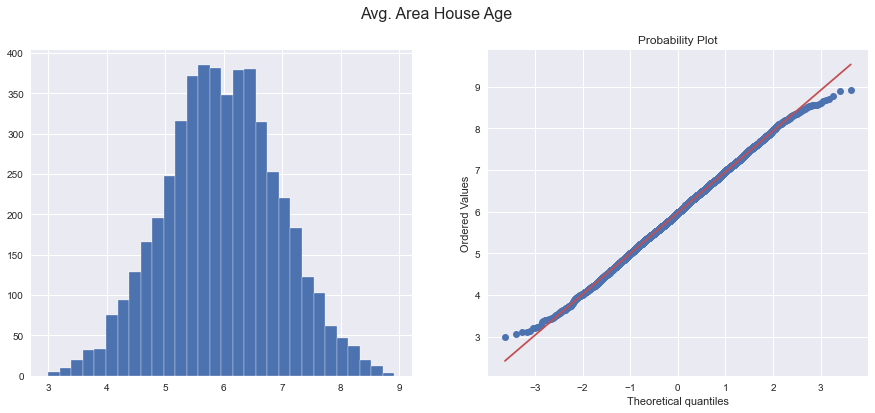

In [44]:
diagnostic_plots(df_outlier, 'Avg. Area House Age')

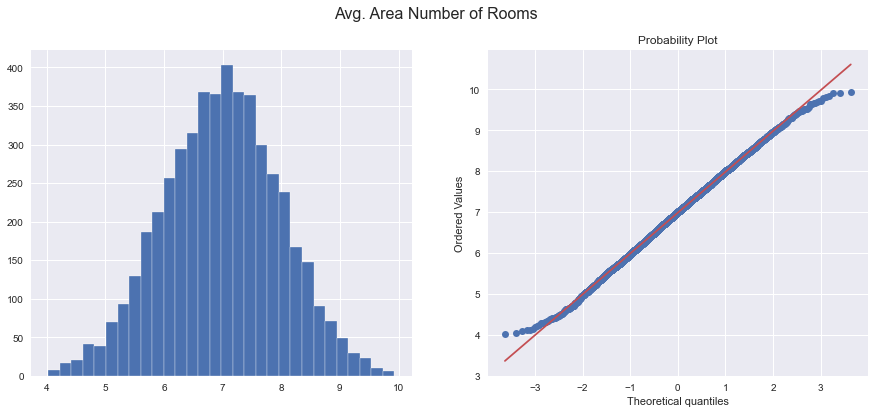

In [45]:
diagnostic_plots(df_outlier, 'Avg. Area Number of Rooms')

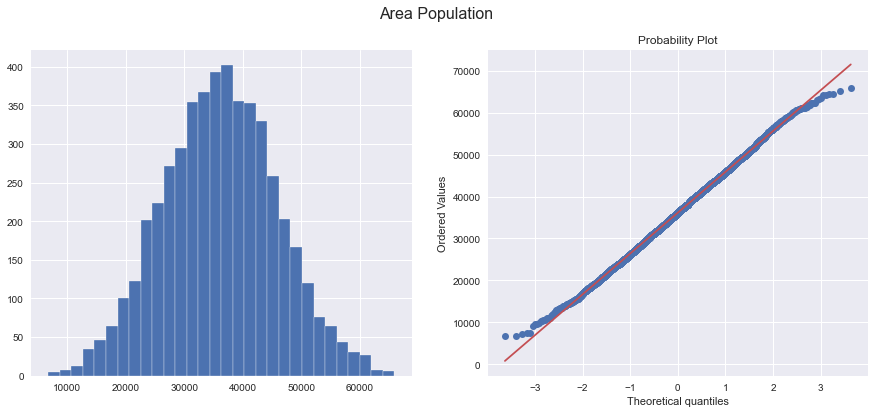

In [47]:
diagnostic_plots(df_outlier, 'Area Population')

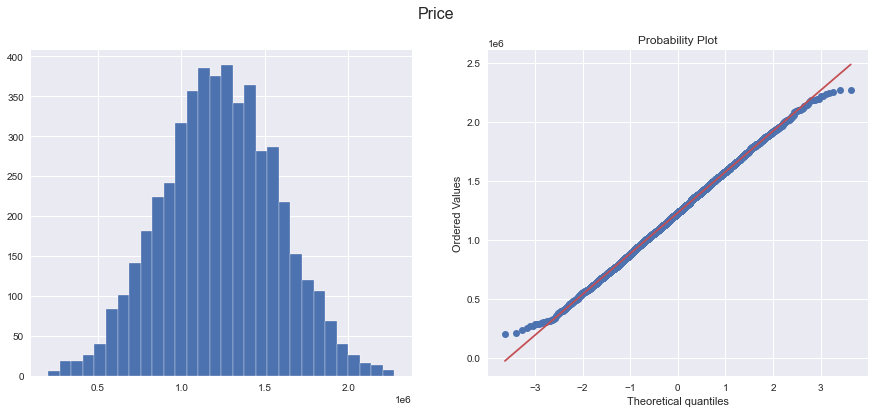

In [48]:
diagnostic_plots(df_outlier, 'Price')

### Model Building

In [156]:
y = df_outlier['Price']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(df_outlier.drop(['Price','Address'],axis = 1), y, test_size=0.3, random_state=0)

#### Standard Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [160]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])


In [161]:
X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)



#### Measuring Performance

In [162]:
from sklearn import metrics
def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

#### Visualizing

In [163]:
def plot(Model,test_pred):
    fig,ax = plt.subplots(figsize = (9,6))
    plt.scatter(y_test, test_pred, c='#0097e3',s = 6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c='red', lw=2.7)
    plt.xlabel('Actuals')
    plt.ylabel('Predicted Values')
    plt.title('Actuals Vs Predicted Values')
    plt.suptitle(Model,fontsize = 16)
    plt.show()
    # increase size

#### Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_std,y_train)

LinearRegression(normalize=True)

In [165]:
test_pred = lin_reg.predict(X_test_std)
train_pred = lin_reg.predict(X_train_std)

In [166]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 80028.1860278289
MSE: 9928269498.907488
RMSE: 99640.70201934292
R2 Square 0.9167570413007272

------TRAIN------
MAE: 81836.5938802817
MSE: 10319950218.780653
RMSE: 101587.15577660718
R2 Square 0.9139642262131528


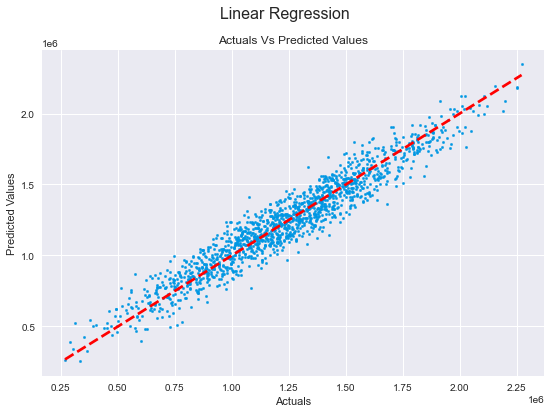

In [167]:
plot('Linear Regression',test_pred)

#### Lasso Regression (L1 Regularization)

In [168]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train_std,y_train)

Lasso(alpha=1)

In [169]:
test_pred = lasso_reg.predict(X_test_std)
train_pred = lasso_reg.predict(X_train_std)

In [170]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 80028.15098216863
MSE: 9928260917.5633
RMSE: 99640.65895789379
R2 Square 0.9167571132504744

------TRAIN------
MAE: 81836.56666197076
MSE: 10319950222.7271
RMSE: 101587.15579603113
R2 Square 0.9139642261802519


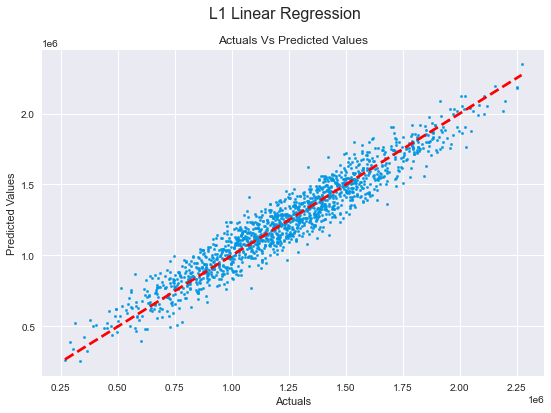

In [171]:
plot('L1 Linear Regression',test_pred)

#### Ridge Regression (L2 Regularization)

In [172]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.8)
ridge_reg.fit(X_train_std,y_train)

Ridge(alpha=1.8)

In [173]:
test_pred = ridge_reg.predict(X_test_std)
train_pred = ridge_reg.predict(X_train_std)

In [174]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 80022.01697400498
MSE: 9926770347.498777
RMSE: 99633.17894907689
R2 Square 0.9167696108425606

------TRAIN------
MAE: 81838.28582532438
MSE: 10319984210.30455
RMSE: 101587.32307874123
R2 Square 0.9139639428312566


#### PloynomialRegrression

In [175]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
#standaer scale
X_train_std_ploy = pipeline.fit_transform(X_train_poly)
X_test_std_ploy = pipeline.transform(X_test_poly)

ploy_reg = LinearRegression()
ploy_reg.fit(X_train_std_ploy, y_train)

LinearRegression()

In [176]:
test_pred = ploy_reg.predict(X_test_std_ploy)
train_pred = ploy_reg.predict(X_train_std_ploy)

In [177]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 80473.60405114344
MSE: 10075426541.661934
RMSE: 100376.42423229637
R2 Square 0.915523212219671

------TRAIN------
MAE: 81288.69986311893
MSE: 10192369045.479956
RMSE: 100957.2634607335
R2 Square 0.9150278500420336


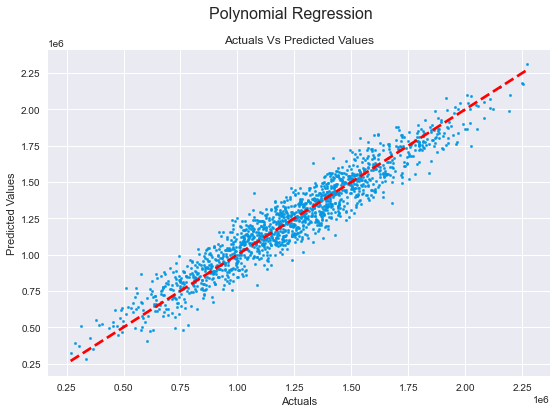

In [178]:
plot('Polynomial Regression',test_pred)

#### KNN Regression

In [152]:
from sklearn.neighbors import KNeighborsRegressor

In [197]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train_std, y_train)

KNeighborsRegressor()

In [198]:
test_pred = neigh.predict(X_test_std)
train_pred = neigh.predict(X_train_std)

In [199]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 100840.23670415631
MSE: 15387510375.98182
RMSE: 124046.40412354491
R2 Square 0.870984375388537

------TRAIN------
MAE: 84846.45991526608
MSE: 11322815457.357569
RMSE: 106408.71889726691
R2 Square 0.9056034991770983


#### Support Vector Regressor (SVR)

In [229]:
from sklearn.svm import SVR

In [234]:
regr = SVR(kernel = 'linear')

In [235]:
regr.fit(X_train, y_train)

SVR(kernel='linear')

In [236]:
test_pred = regr.predict(X_test)
train_pred = regr.predict(X_train)

In [237]:
print("------TEST------")
print()
print_evaluate(y_test,test_pred)
print()
print("------TRAIN------")
print_evaluate(y_train,train_pred)

------TEST------

MAE: 175311.92076715804
MSE: 47193652451.88175
RMSE: 217241.00085361823
R2 Square 0.604307753496002

------TRAIN------
MAE: 181373.20930388966
MSE: 50600163973.88452
RMSE: 224944.8020601599
R2 Square 0.5781545289518961
